# Probability Questions 0 (from your excellent TA Morris)

1. How does the estimation procedure called for finding the optimal parameter value(s) of a model given data work? 
Maximum Likelihood estimation
2. What are good working definitions for the likelihood and prior? 
Density is PDF of one observation. 
Likelihood is the joint density of the data as a function of $\theta$.
Prior is the belief of the parameters. 
<!--
    1. The terms "data" and "parameters" or "model" might be useful in the likelihood definition
    2. The terms "probability" or "belief" might be useful in the prior definition
-->
3. What does introducing a prior mean in terms of choosing a model and its parameters?
Prior is specified after the formation of data model and selection of parameters in model. It is a good fit of parameters based on technical or intuitive consideration of (likelihood of) data model. 
4. What is "certainty" or "level of belief" in how do you express it?
Density functions with low variance has more certainty...

# Probability Questions 1

---

1. Estimate $\Pr(a \leq X \leq b)$ for $X \sim \textrm{beta}(\alpha,\beta)$ by sampling from a beta distribution 
2. Express this statement as an expectation with $f(x)$ the beta density in question 


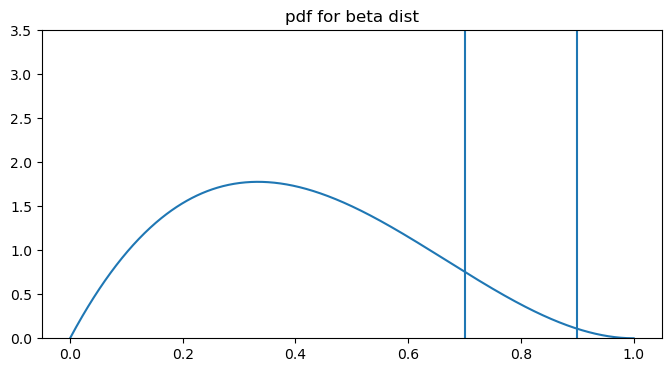

In [20]:
from scipy import stats
import numpy as np; import matplotlib.pyplot as plt

alpha,beta = 2,3; parameter_domain = np.linspace(0,1,1000)
prior = stats.beta(a=alpha,b=beta)

plt.figure(figsize=(8,4)); plt.ylim([0,3.5])
plt.plot(parameter_domain, prior.pdf(parameter_domain));
plt.title('pdf for beta dist')
plt.vlines([a,b],0,3.5)

a,b = .7,.9
true = prior.cdf(b) - prior.cdf(a)


In [13]:
prior.cdf(.2)
m = 10000
(prior.rvs(m)<0.2).mean()

0.181

In [18]:
m = 10000
x = prior.rvs(m)
in_interval = (x >= a) & (x <= b)
sampled = in_interval.mean()
sampled, in_interval.std()/m**0.5, true

(0.0774, 0.0026722507367386013, 0.07999999999999996)

## Monte Carlo Integration
### All Bayesian estimates are just Monte Carlo Integration...

$$
\Large
\begin{align*}
\Pr(a\leq X\leq b)  {} = & \int_a^b f(x) dx \\
{} = & \int 1_{[a,b]}(x) f(x) dx = \mathrm{I\!E}[1_{[a,b]}(x_i)]\\
& \quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\;\;\;\approx \frac{1}{n} \sum_{i=1}^n 1_{[a,b]}(x_i)
\end{align*}
$$


In [53]:
(prior.rvs(m)<0.2).std()/m**0.5

0.0039818869898579495

# Diversion 1: Likelihoods

---


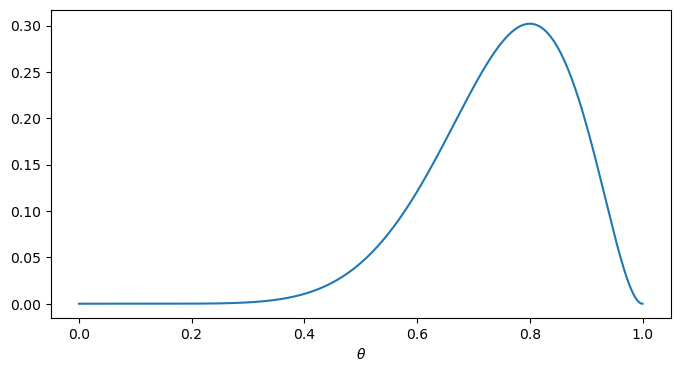

In [2]:
n,x = 10,8  # p_=0.75; stats.binom(n=n, p=p_).rvs()
likelihood = lambda theta: stats.binom.pmf(n=n, k=x, p=theta) # this is a lambda function as a defined function

plt.figure(figsize=(8,4)); plt.xlabel('$\\theta$')
plt.plot(parameter_domain, likelihood(parameter_domain));

# Diversion 2: Posteriors

---

$$
\Large
\begin{align*}
\overset{posterior}{p(\theta|x)} &={} \frac{\overset{likelihood}{p(x|\theta)}\times \overset{prior}{p(\theta)}}{\overset{\text{evidence}}{p(x)}}\\
\end{align*}
$$

### _The posterior is always proportional to the joint_

$$\large p(\theta|x) = (1/c)\times p(\theta,x) \propto{} p(\theta,x)$$

**_and the posterior is always a proper distribution if the prior is_**


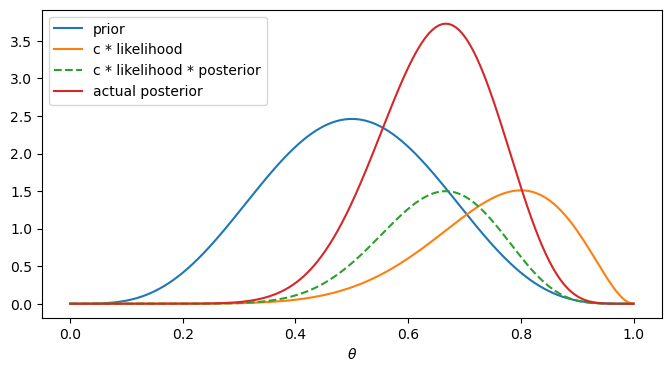

In [30]:
plt.figure(figsize=(8,4))

alpha,beta = 5,5; parameter_domain = np.linspace(0,1,1000)
prior = stats.beta(a=alpha,b=beta)

plt.plot(parameter_domain, prior.pdf(parameter_domain), 
         label='prior')

n,x = 10,8  # p_=0.75; stats.binom(n=n, p=p_).rvs()
likelihood = lambda p: stats.binom.pmf(n=n, k=x, p=p)

c = 5
plt.plot(parameter_domain, c*likelihood(parameter_domain),
         label='c * likelihood')
plt.plot(parameter_domain, 
         c*likelihood(parameter_domain)*prior.pdf(parameter_domain),
         label='c * likelihood * posterior', linestyle="--")

posterior = stats.beta(a=alpha+x,b=beta+n-x)

plt.plot(parameter_domain, posterior.pdf(parameter_domain), 
         label='actual posterior')

plt.legend(); plt.xlabel('$\\theta$');

# Probability Questions 2

---

1. Estimate $\Pr(a \leq \theta \leq b | x)$ for $\theta \sim \textrm{beta}(\alpha+x,\beta+n-x)$ based on sampling 
2. What values for $a$ and $b$ solve $\Pr(a \leq \theta \leq b | x) = 0.95$ for $\theta \sim \textrm{beta}(\alpha+x,\beta+n-x)$?
3. What is your best guess of the values for $a$ and $b$ that solve $\Pr(a \leq \theta \leq b | x) = 0.95$ for $\theta \sim \textrm{beta}(\alpha+x,\beta+n-x)$ if you only have a sample from the beta distribution?


In [31]:
x = posterior.rvs(m)
true = posterior.cdf(b) - posterior.cdf(a)
in_interval = (x >= a) & (x <= b)
in_interval.mean(), true

(0.3337, 0.3328020626006195)

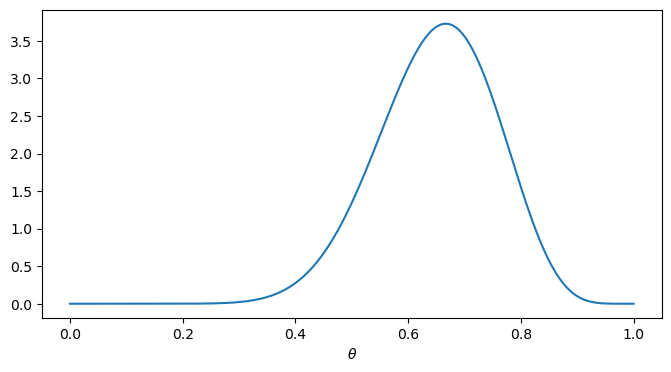

In [4]:
plt.figure(figsize=(8,4)); plt.xlabel('$\\theta$')
posterior = stats.beta(a=alpha+x, b=beta+n-x)
plt.plot(parameter_domain, posterior.pdf(parameter_domain));


In [37]:
posterior.ppf(0.025), posterior.ppf(1-0.025), 

(0.43449843115384906, 0.8371141278449004)

In [35]:
posterior_m = posterior.rvs(m)
sorted(posterior_m)[int(m/40)], sorted(posterior_m)[-int(m/40)]

(0.4320668146005273, 0.8356753989349838)

## Bayesian Credible Interval
$$\Large
\begin{align*}
\underset{\text{e.g., $\alpha=0.05$}}{(1-\alpha)} &\approx{} \int_a^b  p(\theta|x) d\theta \\ & {} \quad \quad  \text{ for } \quad \underset{\text{where $\theta_{(k)}$ is the $k^{th}$ rank ordered posterior sample}}{a=\theta_{\left(\left\lfloor m\times\frac{\alpha}{2}\right\rfloor\right)} \text{ and } b=\theta_{\left(\left\lceil m\times(1-\frac{\alpha}{2})\right\rceil\right)}}
\end{align*}
$$

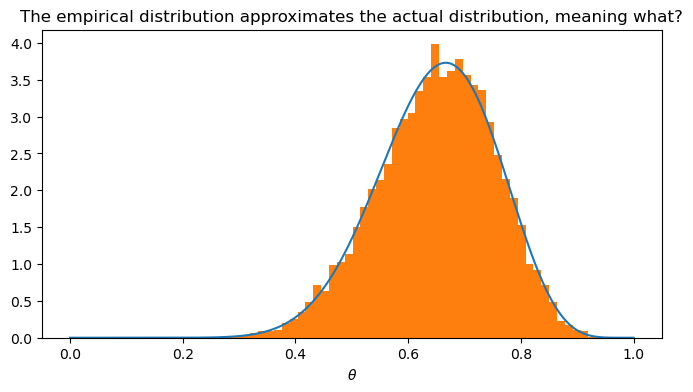

In [9]:
plt.figure(figsize=(8,4)); plt.xlabel('$\\theta$')
plt.title("The empirical distribution approximates the actual distribution, meaning what?")
plt.plot(parameter_domain, posterior.pdf(parameter_domain));
hist = plt.hist(posterior_m, bins=50, density=True)

#plt.vlines([sorted(posterior_m)[int(m/40)],
#            sorted(posterior_m)[-int(m/40)]],0,hist[0].max()); 

5. What does the fact that the empirical distribution approximates the actual distribution allow us to do?
6. Why might this be useful?
7. How is this different than calculating probabilities?
8. Why is Bayesian inference different from Frequentist inference?


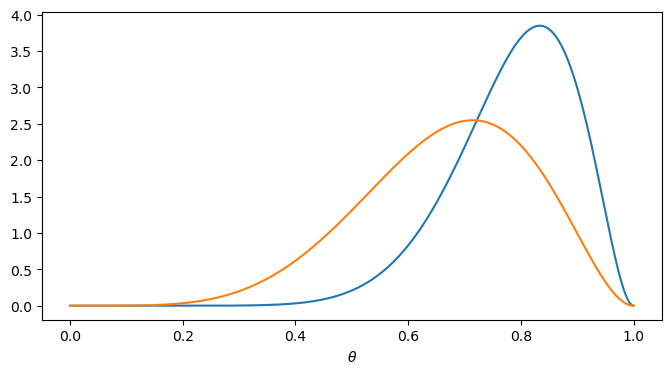

In [10]:
alpha,beta = 3,1; parameter_domain = np.linspace(0,1,1000)
prior = stats.beta(a=alpha,b=beta)

n1,x1 = 10,8  
posterior1 = stats.beta(a=alpha+x1,b=beta+n1-x1)
n2,x2 = 5,3  
posterior2 = stats.beta(a=alpha+x2,b=beta+n2-x2)

plt.figure(figsize=(8,4)); plt.xlabel('$\\theta$')
plt.plot(parameter_domain, posterior1.pdf(parameter_domain))
plt.plot(parameter_domain, posterior2.pdf(parameter_domain));


9. What is $\Pr(\theta_1<\theta_2|x1,x2) = \int\int 1_{\theta_1 < \theta_2}(\theta_1, \theta_2) p(\theta_1|x1)p(\theta_2|x2) d \theta_1 d \theta_2$?
10. What is the chance that a single sample $\theta_1^{(m)}$ is less than another single sample $\theta_2^{(m)}$?
11. What is the density $f(\theta_1 \div \theta_2)$

# Homework

---

### Q1

Complete the code below showing the sequential posterior distributions created as each observation is observed.

\begin{align*}
\text{Likelihood} && p(x|\theta,n) &={} \texttt{Binomial}\\\\
\text{Prior} && \underset{\texttt{Uniform}}{\overset{\texttt{Discrete}}{p(\theta)}} &={} \Bigg\{ \begin{array}{cl} \frac{1}{101} & \text{for }p=\frac{i}{100}\text{ for } i = 0,1,\cdots,100\\ 0 & \text{otherwise} \end{array}\\ 
\text{Posterior} && p(\theta|x,n,\boldsymbol{\alpha}) &={} \overset{\text{Bayes Theorem}}{\frac{p(x|\theta)p(\theta)}{p(x)}} = \; \texttt{What?}\\
&&& \quad\quad\quad\quad\quad\; = \; \texttt{What distribution?}\\
&&& \quad\quad\quad\quad\quad\quad\;\;\, \texttt{With what parameterization?}\\
\end{align*}

### _The posterior is always proportional to the joint_

$$\large p(\theta|x) = (1/c)\times p(\theta,x) \propto{} p(\theta,x)$$

**_and the posterior is always a proper distribution if the prior is_**

### Q2

Return to the last few questions of the lecture and consider the question $\theta_1^{true} < \theta_2^{true}$.

1. Let the $(t)$ superscript indicate time and consider the posteriors 

   $$p(\theta_j|x_j^{(t)},n_j^{(t)}) \propto \theta^{x_j^{(t)}+\alpha_j-1}(1-\theta_j^{(t)})^{n_j^{(t)}-x_j^{(t)}+\beta_j-1}  \Rightarrow \; \text{What distribution?}$$
   
2. Set $n_j^{(0)}=x_j^{(0)}=0$ and iterate time using `for t in range(m):` 

3. At each step flip a coin with success probability $\theta_1^{true}$ or $\theta_2^{true}$ where the chance of flipping based on $\theta_2^{true}$ is $\Pr(\theta_1 < \theta_2 | n_1^{(t)},x_1^{(t)},n_2^{(t)},x_2^{(t)})$

4. Update the $n_j^{(t+1)}$ and $x_j^{(t+1)}$ as appropriate

5. If your algorithm is working then this will automatically learn which of $\theta_1^{true}$ and $\theta_2^{true}$ is larger

This procedure is known as the **Bayesian multi-armed bandit** and is considered a very useful tool for effectively balancing the **exploration-exploitation** tradeoff in the so-called **AB testing** context. You can always search for more information about something to help understanding better.

*Provide some visualizations demonstrating the learning process that the algorithm undergoes.*

### Q3

Generalize this process to a situation where there are three (not two) entitites with binary outcomes, each with differing chances of success of those binary outcomes. Compare two analyses simultaneously based on the same data: 
1. Analysis 1: data for each entity is analyzed independently in the beta-binomial manner described above
2. Analysis 2: data for all entities is analyzed together using a single Dirichlet-multinomial model

*Discuss which of the two approaches you think is most appropriate and describe an actual real world **AB testing** context where you could deploy this **Bayesian multi-armed bandit** to effectively balancing the **exploration-exploitation** tradeoff in that setting.*

### A3

Beta-Binomial is used for independent entities and it is simple.
Dirichlet-Multinomial is used if entities share similarities (e.g., related A/B/C tests)
I beleive Dirichlet-Multinomial is more appropriate as it is more comprehensive.

Consider the following case:

An e-commerce platform tests three homepage designs (A: current, B: new color scheme, C: new layout). The Bayesian multi-armed bandit balances exploring all designs to learn performance and exploiting the best design. If B and C are related, a Dirichlet-Multinomial model can leverage correlations for faster learning. This approach optimizes user traffic allocation to maximize click-through rates.

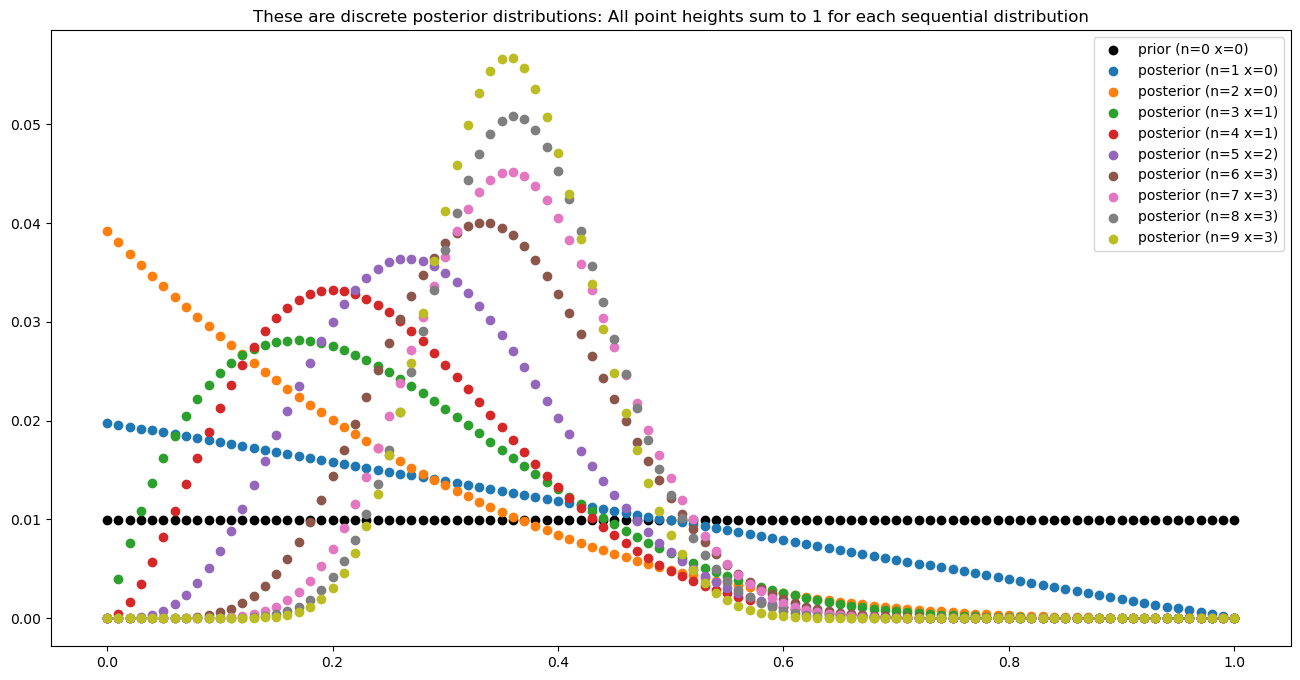

In [7]:
# Q1

import numpy as np; from scipy import stats; import matplotlib.pyplot as plt; import math

parameter_domain = np.linspace(0,1,101) 
prior = np.ones(101)/101 

observations = 0,0,1,0,1,1,0,0,0
n,x = 0,0
plt.figure(figsize=(16,8))
plt.scatter(parameter_domain, prior, label="prior (n="+str(n)+" x="+str(x)+")", color='k')
plt.title("These are discrete posterior distributions: All point heights sum to 1 for each sequential distribution")

for observation in observations:
    n += 1
    x += observation
    likelihood = parameter_domain**x * (1 - parameter_domain)**(n - x) * math.comb(n, x)
    posterior = likelihood * prior
    posterior /= posterior.sum()
    
    prior = posterior
    
    plt.scatter(parameter_domain, posterior, label="posterior (n="+str(n)+" x="+str(x)+")")

plt.legend();

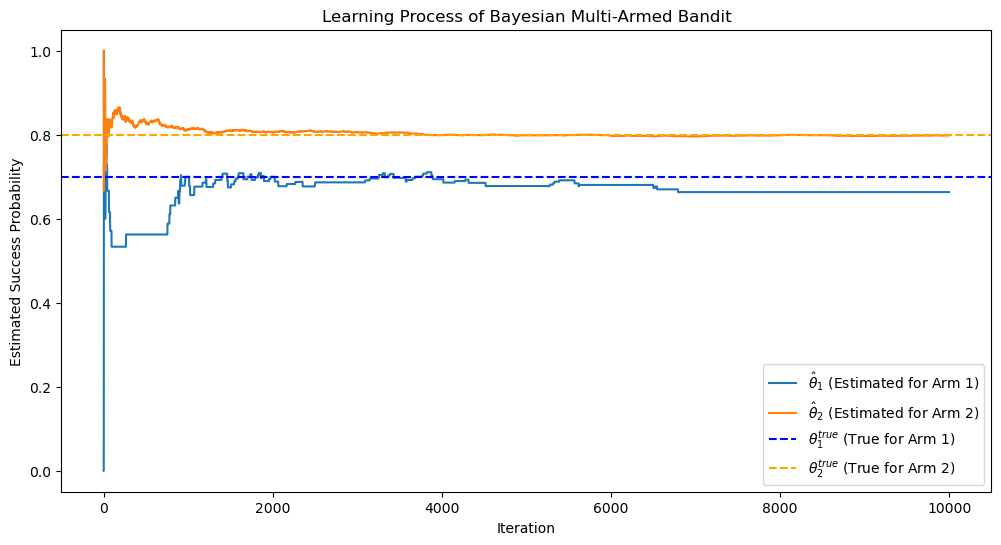

Final values after 10000 iterations:
n1 (trials for arm 1) = 101, x1 (successes for arm 1) = 67
n2 (trials for arm 2) = 9899, x2 (successes for arm 2) = 7902


In [21]:
# Q2

# The posterior distribution is a beta distribution with new alpha_j as x_j^(t) + old alpha_j

import numpy as np
import matplotlib.pyplot as plt

theta1_true = 0.7
theta2_true = 0.8
alpha, beta = 1, 1

n1, x1 = 0, 0
n2, x2 = 0, 0

m = 10000

theta1_estimates = []
theta2_estimates = []

for t in range(m):
    alpha1 = alpha + x1
    alpha2 = alpha + x2
    beta1 = beta + n1 - x1
    beta2 = beta + n2 - x2
    theta1_sample = np.random.beta(alpha1, beta1)
    theta2_sample = np.random.beta(alpha2, beta2)
    
    if theta1_sample > theta2_sample:
        n1 += 1
        reward = np.random.rand() < theta1_true
        x1 += reward
    else:
        n2 += 1
        reward = np.random.rand() < theta2_true
        x2 += reward
        
    if n1 == 0:
        theta1_estimates.append(0) 
    elif n2 == 0:
        theta2_estimates.append(0)
    else:
        theta1_estimates.append(x1 / n1)
        theta2_estimates.append(x2 / n2)

# Visualization of the learning process
plt.figure(figsize=(12, 6))

# Plot the estimated means over time
plt.plot(theta1_estimates, label=r"$\hat{\theta}_1$ (Estimated for Arm 1)")
plt.plot(theta2_estimates, label=r"$\hat{\theta}_2$ (Estimated for Arm 2)")

# Add true values for comparison
plt.axhline(y=theta1_true, color="blue", linestyle="--", label=r"$\theta_1^{true}$ (True for Arm 1)")
plt.axhline(y=theta2_true, color="orange", linestyle="--", label=r"$\theta_2^{true}$ (True for Arm 2)")

plt.title("Learning Process of Bayesian Multi-Armed Bandit")
plt.xlabel("Iteration")
plt.ylabel("Estimated Success Probability")
plt.legend()
plt.show()

print(f"Final values after {m} iterations:")
print(f"n1 (trials for arm 1) = {n1}, x1 (successes for arm 1) = {x1}")
print(f"n2 (trials for arm 2) = {n2}, x2 (successes for arm 2) = {x2}")

In [ ]:
# Q3

# Beta-Binomial is used for independent entities and it is simple.
# Dirichlet-Multinomial is used if entities share similarities (e.g., related A/B/C tests)
# I beleive Dirichlet-Multinomial is more appropriate as it is more comprehensive.

# Consider the following case:
 
# An e-commerce platform tests three homepage designs (A: current, B: new color scheme, C: new layout). 
# The Bayesian multi-armed bandit balances exploring all designs to learn performance and exploiting 
# the best design. If B and C are related, a Dirichlet-Multinomial model can leverage correlations for 
# faster learning. This approach optimizes user traffic allocation to maximize click-through rates.

## Bayesian/Sequential Learning

A prior is updated to a posterior which becomes the new prior for the next data

\begin{array}{llll}
1.&&\!\!\!\!\!\!&\!\!\!\!\!\!p(\theta | x_1) \propto {} f(x_1|\theta)p(\theta) \\
2.&&\!\!\!\!\!\! p(\theta | x_1, x_2) \propto f(x_2|\theta)&\!\!\!\!\!\!p(\theta | x_1) \\
3.&p(\theta | x_1, x_2, x_3) \propto{} f(x_3|\theta) & \!\!\!\!\!\! p(\theta | x_1, x_2)  \\
\vdots\\
\end{array}

### But this is the same as a single batch update

$$p(\theta | x_1, x_2, x_3) \propto f(x_1,x_2,x_3|\theta)p(\theta)
\overset{(x_i \perp\!\!\perp x_j | \theta)}{=} \underbrace{f(x_1|\theta)f(x_2|\theta)f(x_3|\theta)p(\theta)}_{\left[ \prod_{i=1}^{3}f(x_i|\theta)\right]p(\theta)} $$

## Conditional Independence

\begin{align*}
\text{Conditional Independence} && p(x_2|\theta) &={} p(x_2|x_1,\theta) \; \text{ or } \; (x_2 \perp\!\!\!\perp x_1 | \theta)
\end{align*}

\begin{align*}
p(\theta|x_2,x_1) &\propto{} p(x_2, x_1, \theta)\\
& = {} \underbrace{p(x_2| \theta, x_1)} p(x_1 | \theta) p(\theta)
\color{gray}{\longleftarrow \text{chain rule}}\\
& \quad (x_2 \perp\!\!\!\perp x_1 | \theta)\\
& = {} \overbrace{\;\;p(x_2| \theta)\;\;} \underbrace{p(x_1 | \theta) p(\theta)}_{\propto \; p(\theta|x_1)}\\
&\propto{}  p(x_2| \theta) \underbrace{p(\theta | x_1)}_{\text{new prior}} \longleftarrow \text{previous posterior}
\end{align*}

A prior is updated to a posterior which becomes the new prior for the next data